In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor 
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [2]:
data=pd.read_csv(r"C:\Users\Arshia Sood\Desktop\ML project\notebook\data\stud.csv")

In [3]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
x=data.drop(columns=["math_score"],axis=1)
y=data["math_score"]

In [18]:
num_features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

scaler=StandardScaler()
encoder=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",encoder,cat_features),
        ("StandardScaler",scaler,num_features)
    ]
)


In [19]:
x=preprocessor.fit_transform(x)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 21), (200, 21))

In [21]:
def eval_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_sq=r2_score(true,predicted)
    return mae,mse,r2_sq

In [22]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neihbors Regressor":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XGBoost Regressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae,model_train_rmse,model_train_r2=eval_model(y_train, y_train_pred)

    model_test_mae,model_test_rmse,model_test_r2=eval_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 22.4492
- Mean Absolute Error: 3.7439
- R2 Score: 0.9004
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 22.2508
- Mean Absolute Error: 3.7579
- R2 Score: 0.9086


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1153
- Mean Absolute Error: 0.2724
- R2 Score: 0.9995
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1178
- Mean Absolute Error: 0.2684
- R2 Score: 0.9995


K-Neihbors Regressor
Model performance for Training set
- Root Mean Squared Error: 18.3105
- Mean Absolute Error: 3.3838
- R2 Score: 0.9188
---------------------

In [23]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,0.999516
6,XGBoost Regressor,0.977101
7,CatBoosting Regressor,0.968100
5,Random Forest,0.962006
4,Decision Tree,0.933159
8,AdaBoost Regressor,0.925113
1,Lasso,0.908560
3,K-Neihbors Regressor,0.889781


In [24]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


Text(0, 0.5, 'Predicted')

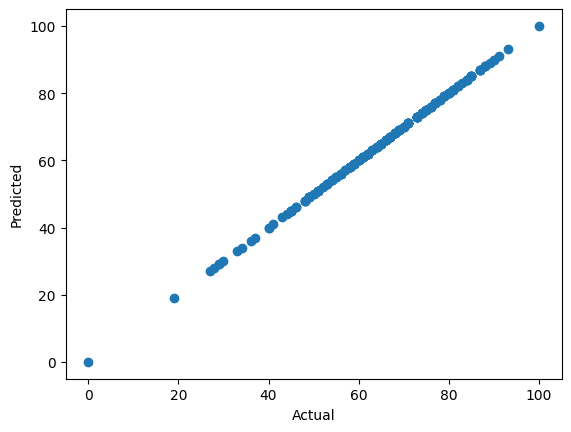

In [25]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")